# Исследование рынка игровой индустрии <a name="0"></a>

Данное исследование проведено для интернет-магазина компьютерных игр на основе открытых данных до 2016 года о продажах игр, оценках пользователей и экспертов, популярных жанрах и платформах. Цель исследования — выявить закономерности, определяющие успешность игры. Результаты исследования будут использоваться для прогнозирования популярности новых игр и планирования рекламных кампаний со ставкой на потенциально "звездные" релизы.

____
### Оглавление

#### [Часть 1. Первичное изучение полученных данных](#1)

   [1.1 Загрузка библиотек и файлов с данными](#1.1)  
   [1.2 Изучение основных параметров датафрейма](#1.2)  
   [1.3 Описание полученных данных](#1.3)  
   [1.4 Выводы: описание основных проблем в данных](#1.4)  

#### [Часть 2. Подготовка данных к анализу](#2)

   [2.1 Удаление нерелевантной информации](#2.1)  
   [2.2 Изменение регистра в строках "object" и поиск дубликатов](#2.2)  
   [2.3 Замена пропусков и изменение типа данных](#2.3)  
   [2.4 Дополнительные рассчеты](#2.4)  
   [2.5 Выводы: итоги подготовки данных к анализу](#2.5)  

#### [Часть 3. Исследовательский анализ данных](#3)

   [3.1 Изучение рынка и поиск закономерностей](#3.1)  
   [3.2 Описание актуального периода для построения прогнозов](#3.2)  
   [3.3 Оценка актуальных платформ и поиск критериев определения популярности для игр](#3.3)  
   [3.4 Выводы: актуальные платформы и результаты исследования критериев оценки популярности игр](#3.4)  

#### [Часть 4. Анализ "портретов" пользователей для разных регионов](#4)

   [4.1 Анализ популярности платформ/жанров для регионов (NA, EU, JP)](#4.1)  
   [4.2 Анализ влияния рейтинга ESRB на продажи в регионах (NA, EU, JP)](#4.2)  
   [4.3 Вывод: различия игрового рынка для разных регионов](#4.3)  

#### [Часть 5. Проверка рабочих гипотез для построения прогнозов на новый сезон](#5)

   [5.1 Гипотеза о пользовательских оценках для разных платформ](#5.1)  
   [5.2 Гипотеза о пользовательских оценках для разных игровых жанров](#5.2)  
   [5.3 Выводы: результаты проверки гипотез](#5.3)

#### [Итоговые выводы исследования](#6)
____

## Часть 1. Первичное изучение полученных данных <a name="1"></a>

### 1.1 Загрузка библиотек и файлов с данными <a name="1.1"></a>

In [1]:
# импорт библиотек для проведения исследования
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# загрузим файл с данными 
data_games = pd.read_csv("/datasets/games.csv")

### 1.2 Изучение основных параметров датафрейма <a name="1.2"></a>

In [3]:
# функция для изучения основных параметров датафрейма
def df_info(data):
    print("\033[1m\033[34mПервые и последние 5 строк таблицы:\033[0m")
    display(data.head(), data.tail())
    print("\033[1m\033[34mОбщая информация о данных в таблице:\033[0m")
    display(data.info())
    print("\033[1m\033[34mОсновние статистические показатели:\033[0m")
    display(data.describe())

In [4]:
# изучим данные в таблице
df_info(data_games)

Первые и последние 5 строк таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Общая информация о данных в таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Основние статистические показатели:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# скорректируем названия столбцов 
data_games.columns = data_games.columns.str.lower()

### 1.3 Описание полученных данных <a name="1.3"></a>

В датафрейме хранятся данные об играх, выпущенных в период с 1980 по 2016 год: всего около 11559 уникальных наименований. **Данные сохранены в `data_games` и записаны в 11 колонок и имеют следующие типы:** 
* **name** — название игры (тип данных `object`)  
* **platform** — платформа (тип данных `object`)  
* **year_of_release** — год выпуска (тип данных `float64`)  
* **genre** — жанр игры (тип данных `object`)  
* **na_sales** — продажи в Северной Америке (миллионы проданных копий) (тип данных `float64`)  
* **eu_sales** — продажи в Европе (миллионы проданных копий) (тип данных `float64`)  
* **jp_sales** — продажи в Японии (миллионы проданных копий) (тип данных `float64`)  
* **other_sales** — продажи в других странах (миллионы проданных копий) (тип данных `float64`)  
* **critic_score** — оценка критиков (максимум 100) (тип данных `float64`)  
* **user_score** — оценка пользователей (максимум 10) (тип данных `object`)  
* **rating** — рейтинг от организации ESRB (тип данных `object`)  
  
*Примечание: ESRB (англ. Entertainment Software Rating Board) — ассоциация, определяющая рейтинг компьютерных игр и присваивающая им подходящую возрастную категорию.* **В колонке `rating` встречаются следующие категории:**  
* **«E» («Everyone») — «Для всех»:** Содержание подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.   
* **«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»:** Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.  
* **«M» («Mature») — «От 17 лет»:** Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Некоторые торговые сети не продают игры с таким рейтингом несовершеннолетним без согласия родителей.  
* **«AO» («Adults Only 18+») — «Только для взрослых»:** Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.  
* **«K-A» («Kids to Adults»)— «Для детей и взрослых»:** Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык.  
* **«T» («Teen») — «Подросткам»:** Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
* **«EC» («Early childhood») — «Для детей младшего возраста»:** Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.  
* **«RP» («Rating Pending»«) — «Рейтинг ожидается»:** Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.  
  
В колонке `user_score` можно встретить сокращение "TBD", которое расшифровывается как "To Be Determined" ("Будет определено") — такой статус появляется в анонсах игр, когда дата выхода еще не определена, соответственно, на тот момент пользователи еще не могут дать свою оценку игре.  

### 1.4 Выводы: описание основных проблем в данных  <a name="1.4"></a>

**В датафрейме присутствует большое количество пропусков:**  
* 2 пропуска совпадают для колонок `name` и `genre`,   
* 269 в колонке `year_of_release`,  
* 8578 пропусков в колонке `critic_score`,
* 6701 пропущенных значений в колонке `user_score`,
* 6766 в колонке `rating`.    
  
**Среди других проблем:** неверное определение типов данных из-за пропусков или наличия буквенных аббревиатур в колонке, предполагающей числовую оценку, также есть проблема с годами. Мы также скорректировали названия столбцов и привели их написание к нижнему регистру.  
  
В колонках с наименованиями игр, платформ и жанров могут возникнуть скрытые дубликаты из-за ошибок в написании региста, чтобы убедиться в их отсутствии, далее лучше привести данные к единому регистру (нижнему).  
  
**Необходимо обратить внимание на данные по продажам в разных странах**, так как в каждой из колонок, описывающих эти данные присутствуют нулевые значения в 25% случаев.

## Часть 2. Подготовка данных к анализу <a name="2"></a>

### 2.1 Удаление нерелевантной информации <a name="2.1"></a>

In [6]:
# удалим строки с пропущенными значениями в колонке name
data_games.dropna(subset=["name"], inplace=True)

# скорректируем индексы
data_games = data_games.reset_index(drop=True)

### 2.2 Изменение регистра в строках "object" и поиск дубликатов <a name="2.2"></a>

In [7]:
# приведем к нижнему регистру названия игр, наименования платформы и жанра
for column in ["name", "platform", "genre"]:
    data_games[column] = data_games[column].str.lower()

In [8]:
# проверка
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# теперь проверим данные на наличие полных дубликатов
data_games.duplicated().sum()

0

### 2.3 Замена пропусков и изменение типа данных <a name="2.3"></a>

Заменим значения "tbd" и все "NaN" на маркерное значение 777 в колонках с оценками пользователей и критиков — по маркерному значению мы сможем легко сортировать данные и не учитывать их при необходимости:

In [10]:
for column in ["critic_score", "user_score"]:
    data_games[column] = data_games[column].fillna(777)
    data_games[column] = data_games[column].replace("tbd", 777)

# заменим тип данных в колонке user_score на float
data_games["user_score"] = data_games["user_score"].astype("float")

In [11]:
# подготовка к замене пропусков в колонке year_of_release
# создадим словарь с уникальными наименованиями игр и датой последнего релиза
release_dict = (
    data_games.loc[:, ["name", "year_of_release"]]
    .query("year_of_release >= 1980")
    .drop_duplicates()
    .sort_values(["year_of_release"], ascending=False)
    .groupby("name")
    .first()
    .reset_index()
)

In [12]:
# функция для заполнения пропусков в колонке year_of_release
def for_null_year(data):
    if np.isnan(data["year_of_release"]):
        try:
            return release_dict.loc[release_dict["name"] == data["name"], "year_of_release"].array[0]
        except: pass
    return data["year_of_release"]
            
# применим функцию
data_games["year_of_release"] = data_games.apply(for_null_year, axis=1)

In [13]:
# изменим типы данных в колонках year_of_release и critic_score на "Int64"
for column in ["year_of_release", "critic_score"]:
    data_games[column] = data_games[column].astype("Int64")

In [14]:
# прверим полученные результаты
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int64  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### 2.4 Дополнительные рассчеты <a name="2.4"></a>

In [15]:
# рассчитаем суммарное количество продаж по всем странам (результат в миллионах копий)
data_games["total_sales"] = (
    data_games["na_sales"]
    + data_games["eu_sales"]
    + data_games["jp_sales"]
    + data_games["other_sales"]
)

# проверим результат
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,777,777.0,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,777,777.0,NaN,31.38


### 2.5 Выводы: итоги подготовки данных к анализу <a name="2.5"></a>

**В датафрейме присутствовало достаточно большое количество пропусков:**  
*  2 пропуска совпадают для колонок `name` и `genre` — их крайне мало и при этом невозможно заполнить на основании других данных, поэтому эти строки мы удалим.    
*  Пропуски в колонке `year_of_release` частично получилось заполнить на основании днных по играм с таким же названием, выпущенными на других платформах — год выпуска в большинстве случаев в этом случае будет совпадать. Однако, есть риск указать неверный год из-за перевыпуска игры с одним названием на новых платформах (пример такой игры — "space invaders",  которая выпускалась с единым названием в 1994, 1999 и 2002 годах). Учитывая это, мы взяли за основу самый последний год выпуска и таким образом получилось заполнить 123 пропуска из 269. Год из названия брать не рекомендуется, так как он может не совпадать с годом релиза (пример — релиз 2003 года игры "fifa soccer 2004").  
*  Пропуски в колонках `critic_score` и `user_score` мы не можем заполнить средними значениями, так как на оценку может влиять множество факторов, в том числе год выпуска игры и платформы, на которой она выпущена. При этом оценки критиков чуть более стабильны (у критиков с профессиональной точки зрения больше объективных критериев оценки, когда пользователи оценивают эмоционально), но любое изменение в оценках может исказить реальные показатели, поэтому мы заполним пропуски маркерными значениями "777", чтобы при необходимости их можно было легко найти и исключить из расчетов.
*  Пропуски в колонке `rating` (6766 значений) не получится заполнить на основании данных по играм с таким же названием, так как классификация может отличаться для игры в зависимости от года выпуска и платформы (например, "need for speed: most wanted", выпущенный в 2005 году имеет rating T на платформах "pc"/"gc" и рейтинг Е для платформы "gba")

**Пропуски могли возникнуть по разным причинам.** Пропуски в названии и жанре, годе выпуска, а также частично в оценках игр критиками и пользователями могли появиться **в результате технического сбоя при выгрузки данных или неполноты данных в открытых источниках**. Наибольшее количество пропусков обнаружено в колонках `critic_score` и `user_score` — рекомендуем проверить возможные причины их появления, в случае потери на этапе выгрузки, необходимо будет исправить технические проблемы. Также **большое количество пропусков обнаружены в колонке `rating`, однако, в данном случае это скорее норма, чем отклонение**, так как для данных до 1994 года этой классификации быть не может (ее не существовало), часть игр могли перестать существовать до получения класса, а часть на момент публикации данных могла находится в ожидании получения класса от ассоциации ESRB.  
  
Скрытых дубликатов не обнаружено. Дополнительно мы рассчитали и добавили в колонку `total_sales` суммарное количество проданных копий (в миллионах) для каждой игры.

## Часть 3. Исследовательский анализ данных <a name="3"></a>

### 3.1 Изучение рынка и поиск закономерностей <a name="3.1"></a>

In [16]:
# количество игр, выпущенных в разные годы
(data_games
 .pivot_table(index="year_of_release", values="name", aggfunc="count")
 .style.background_gradient(axis=0, cmap="Blues")
)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [17]:
# создадим таблицу с платформами, популярными в разные года
popular_platform = (
    data_games
    .pivot_table(index=["platform", "year_of_release"], 
                 values=["total_sales"], 
                 aggfunc=("sum"))
    .reset_index()
)

# переименуем столбцы
popular_platform.columns = ["platform", "year_of_release", "total_sales"] 

# определим самые "продающие" платформы:
# шаг 1: изучем данные по продажам
popular_platform["total_sales"].describe(percentiles=[0.1, 0.3, 0.5, 0.65, 0.7, 0.9])

count    242.000000
mean      36.651157
std       48.649102
min        0.020000
10%        0.271000
30%        4.639000
50%       15.435000
65%       34.379500
70%       38.406000
90%      119.494000
max      211.810000
Name: total_sales, dtype: float64

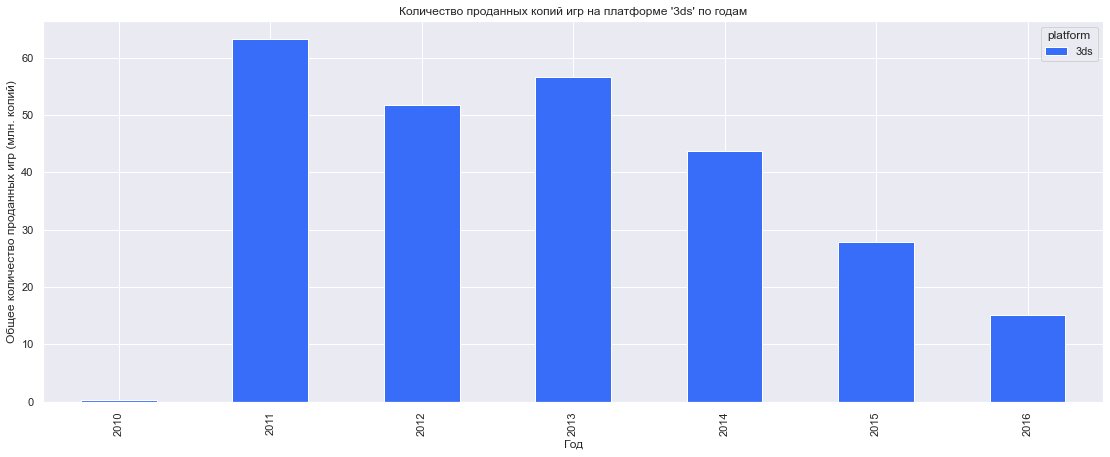

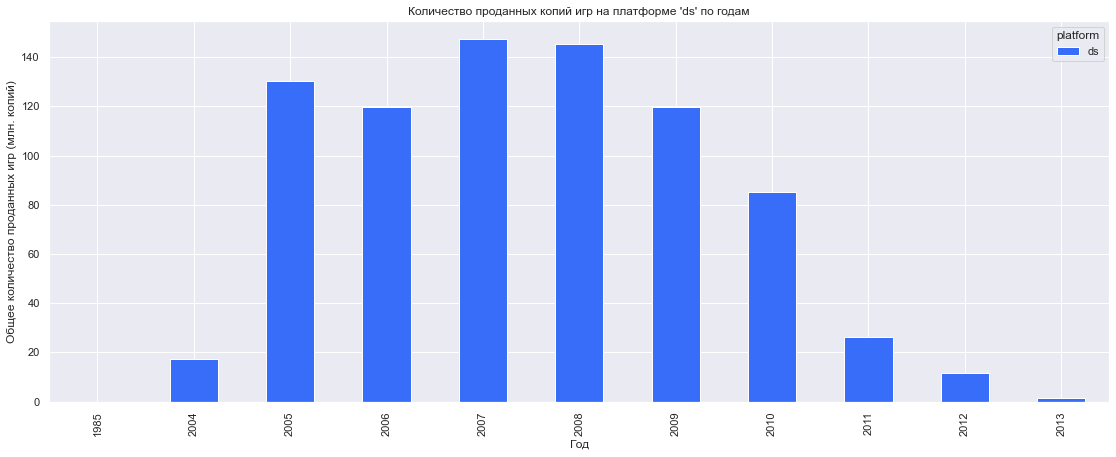

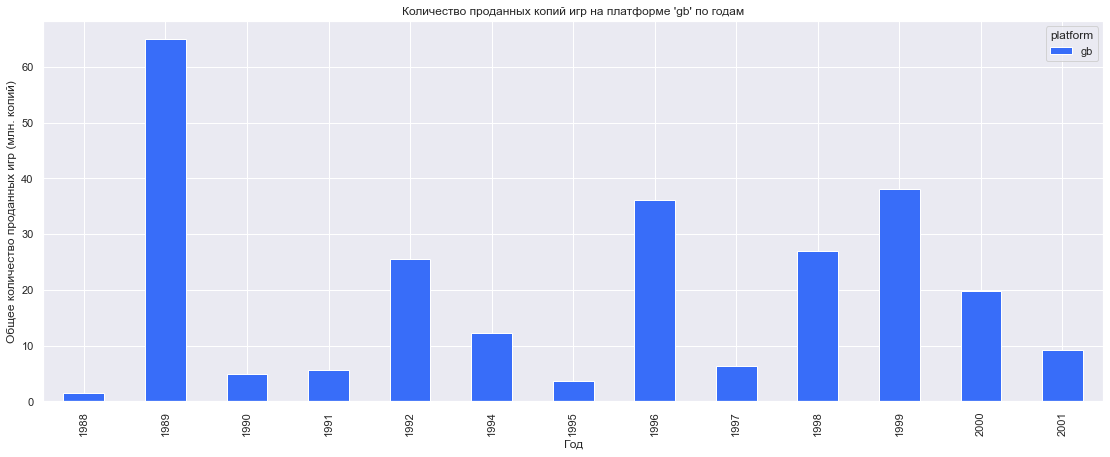

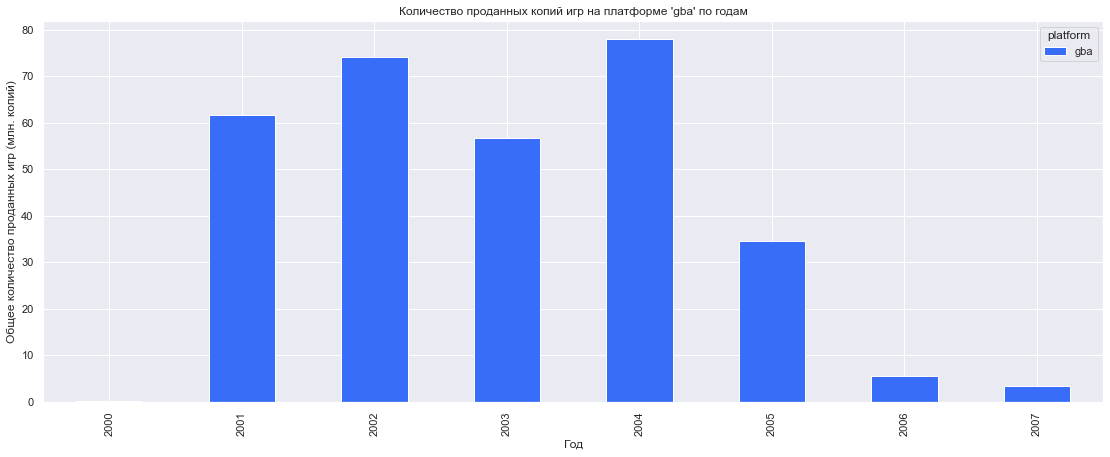

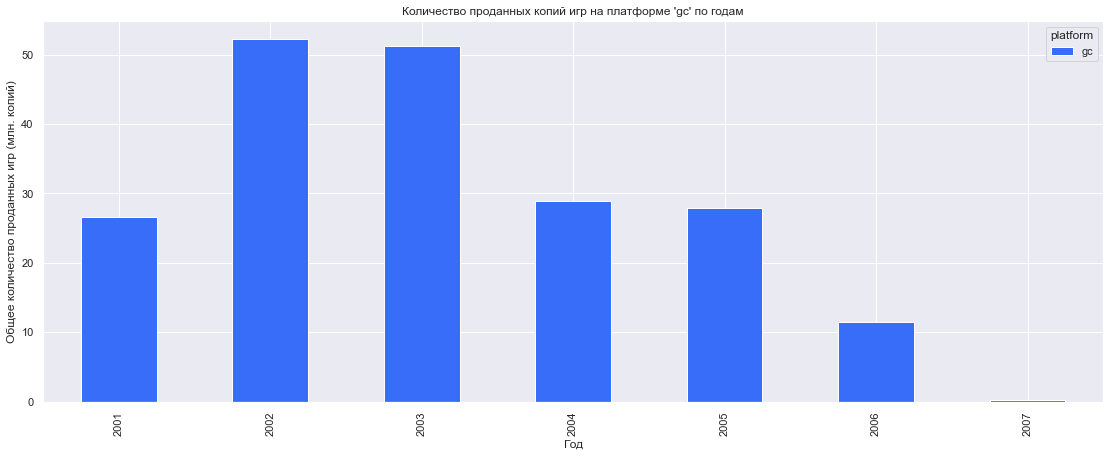

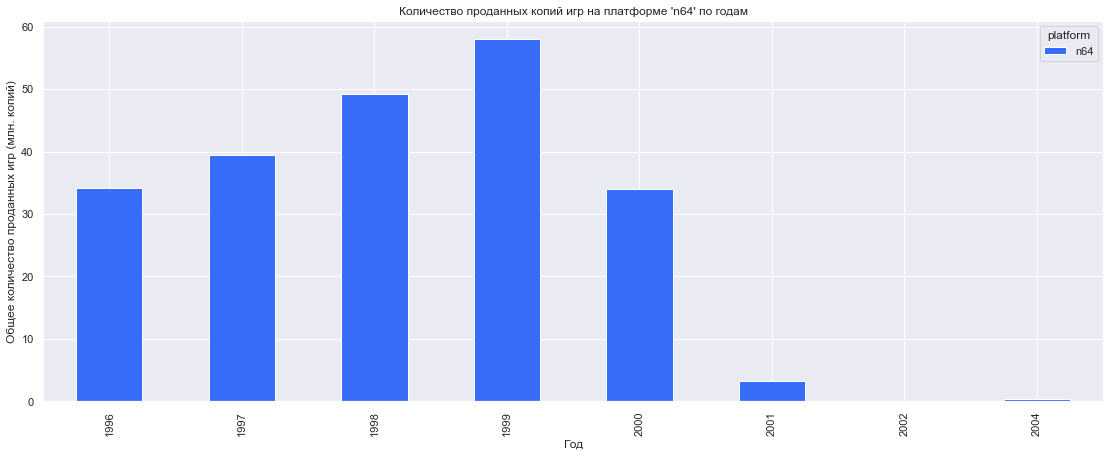

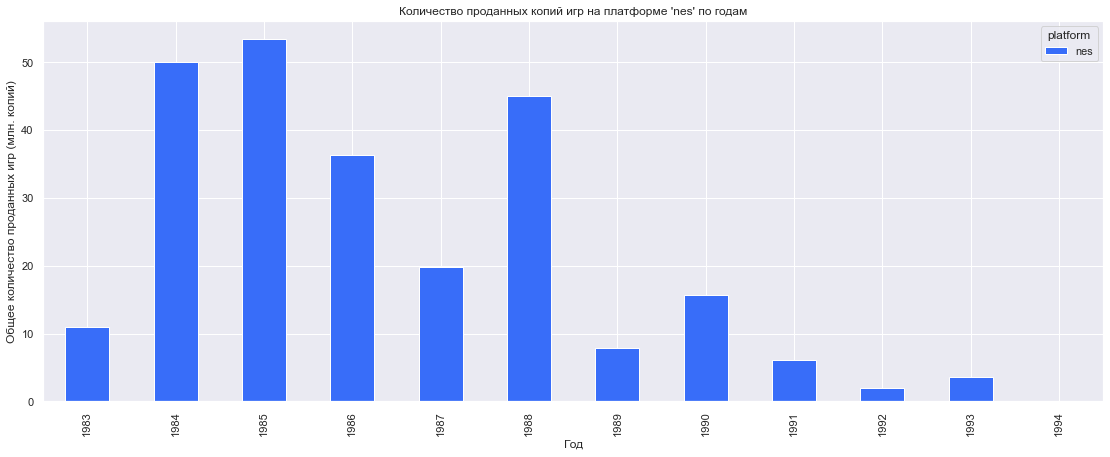

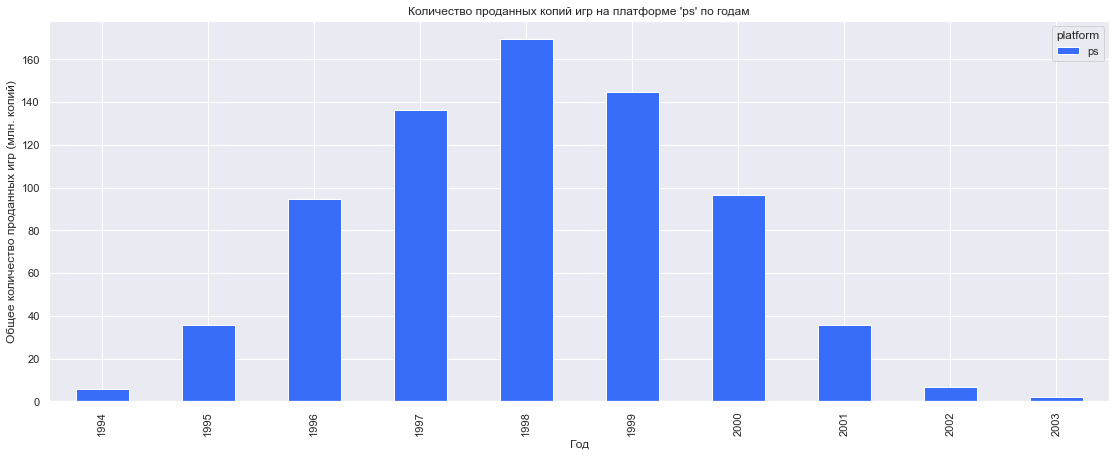

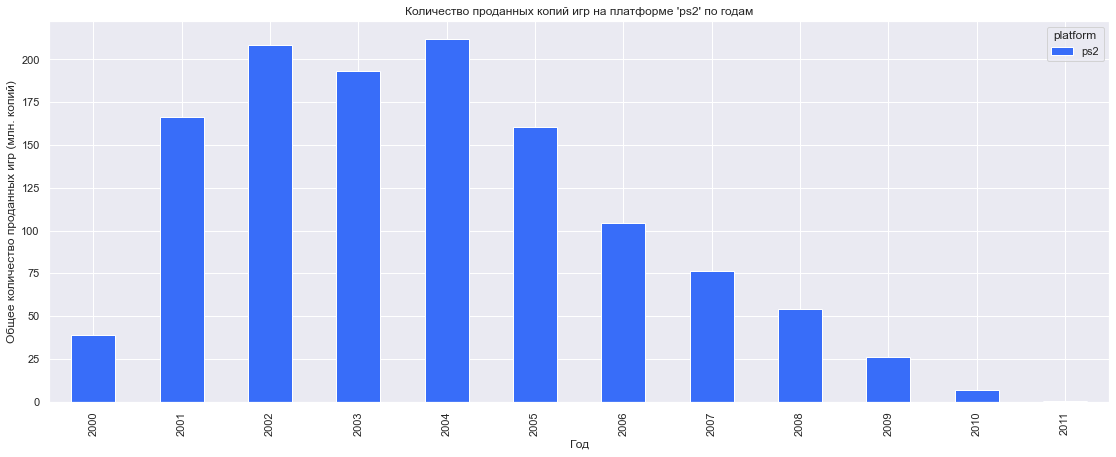

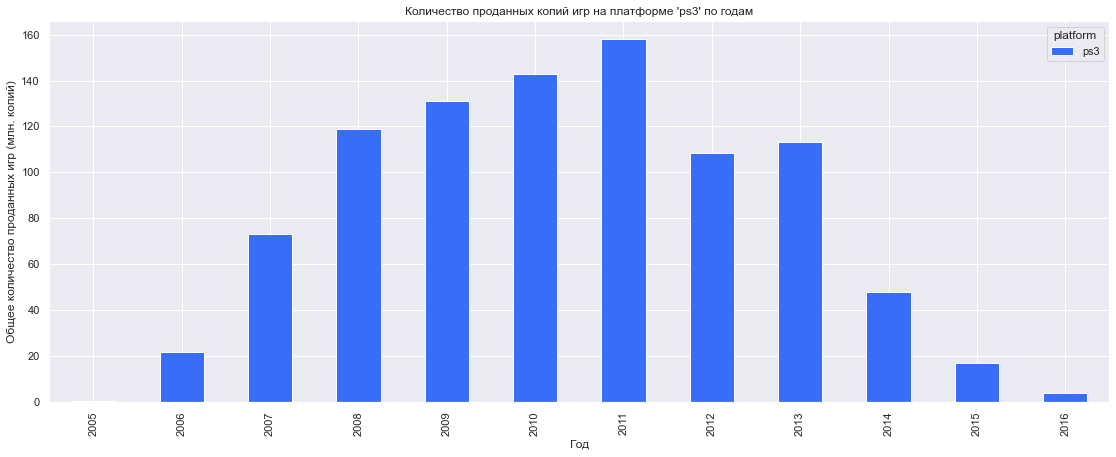

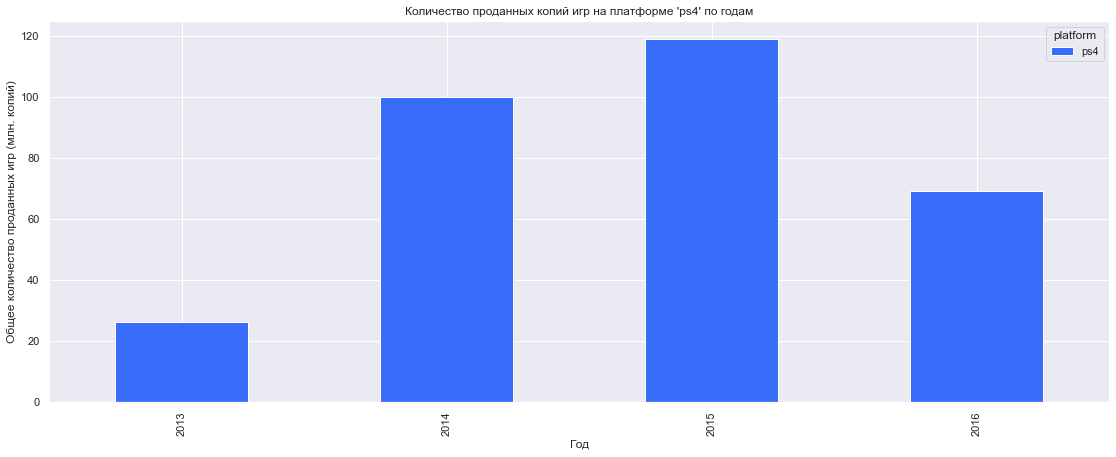

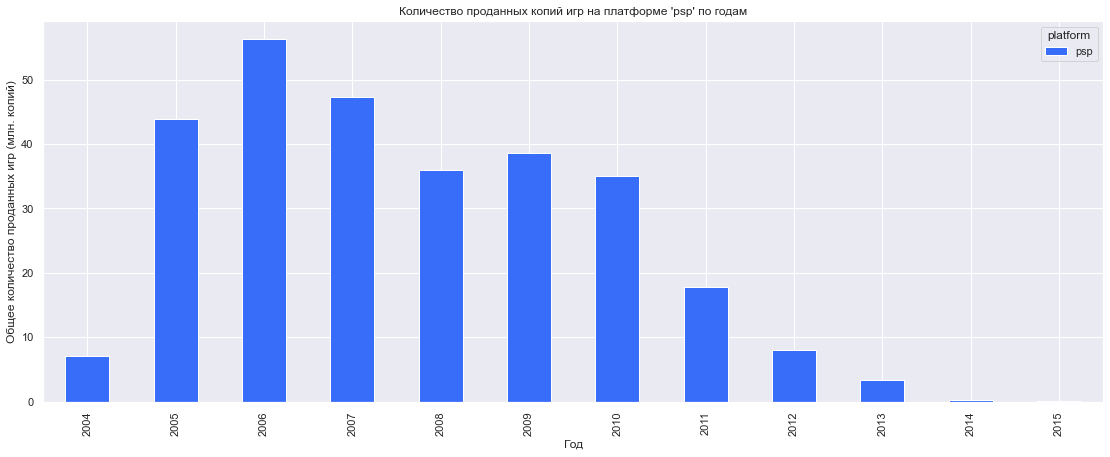

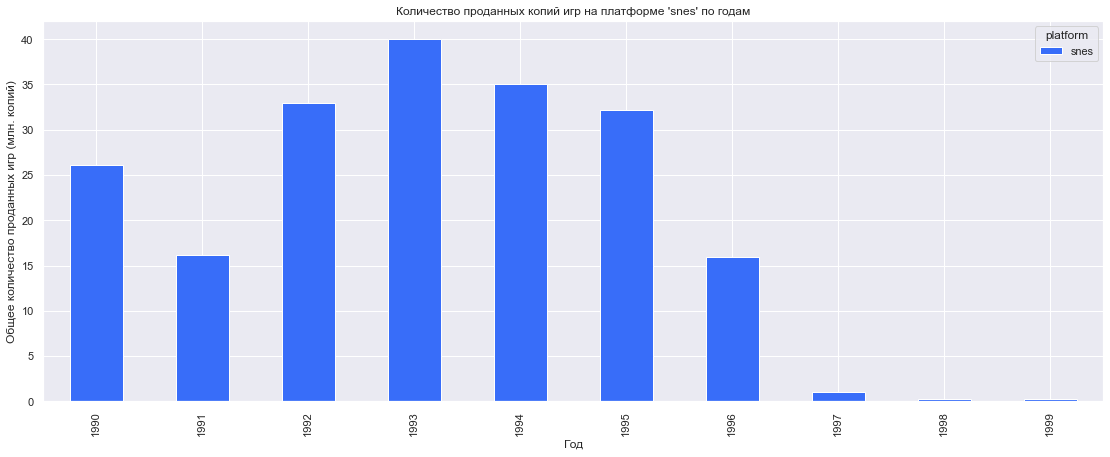

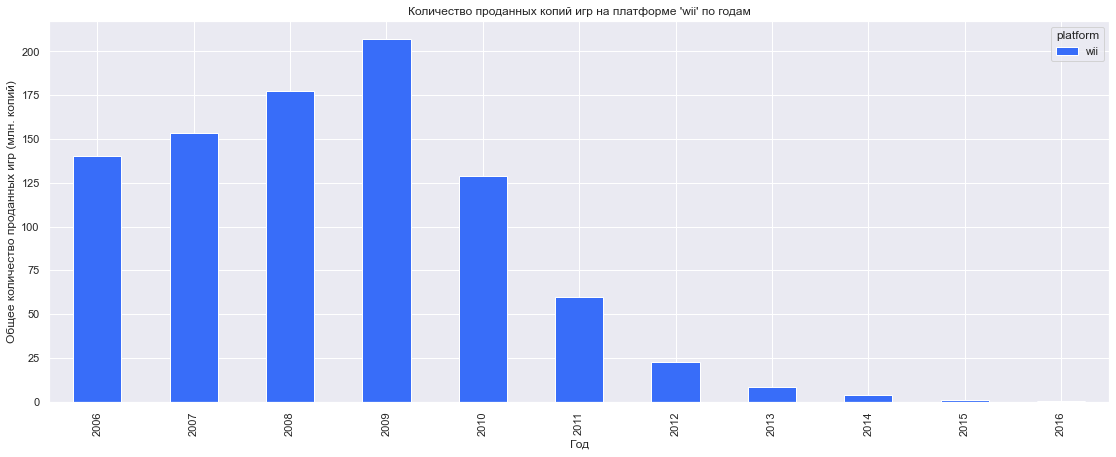

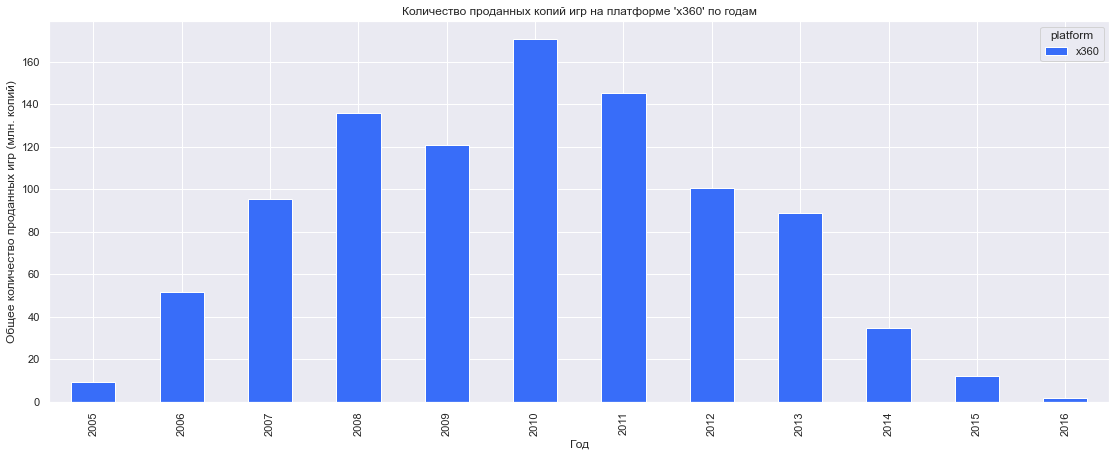

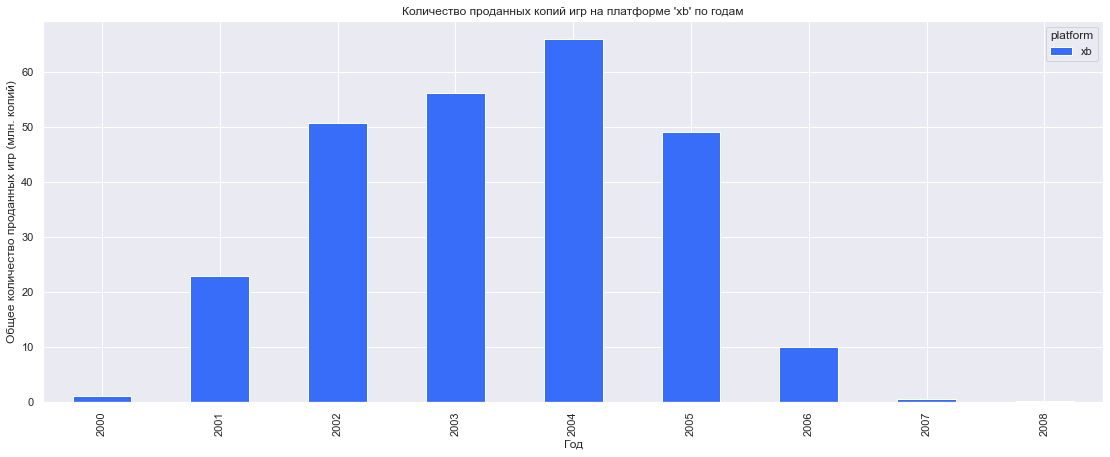

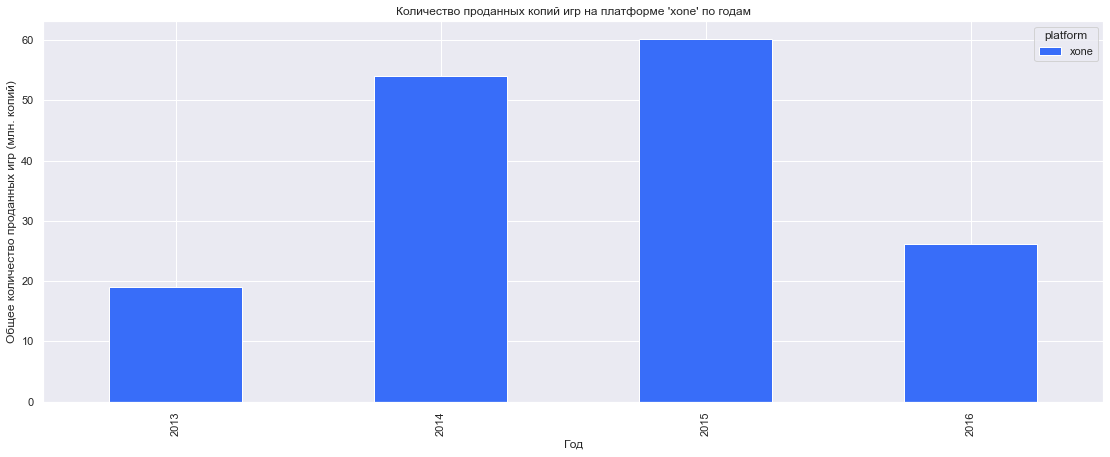

In [18]:
# шаг 2: возьмем среднее значение за переменную для поиска самых "продающих" платформ
mean_sales = popular_platform['total_sales'].mean()

# шаг 3: сделаем срез по "продающим" платформам и сохраним названия платформ в переменную top_platform
top_platform = (
    popular_platform
    .query("total_sales > @mean_sales")["platform"]
    .unique()
    .tolist()
)

# шаг 4: построем распределение по годам для популярных платформ

for key in top_platform:
    sns.set(rc={"figure.figsize":(19, 7)}, font_scale = 1, style="darkgrid", palette="rainbow")
    
    ax = (
        popular_platform[popular_platform["platform"] == key]
        .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
        .plot(kind="bar", grid=True)
    )
    
    plt.title("Количество проданных копий игр на платформе '{}' по годам".format(key))
    plt.ylabel("Общее количество проданных игр (млн. копий)")
    plt.xlabel("Год")

### 3.2 Описание актуального периода для построения прогнозов <a name="3.2"></a>

Для определения актуального периода для построения прогноза на следующий год мы изучили количество вышедших в продажу на всех платформах игр по годам, а также изучили жизненный цикл популярных платформ.  

Игровой рынок до 2008-2009 года стабильно рос и набирал популярность, первый заметный пик (рост количества выпущенных игр) пришелся на 2002 года, максимальные значения наблюдались в 2008-2009 годах и далее количество выпущенных игр постепенно снижалось.  Начиная с 2012 года количество игр, выпущенных на разных платформах, постепенно стабилизировалось и в среднем стало выходить до 600 новинок в год. Игры стали сложнее, производственный цикл длиннее, а запросы пользователей и стоимость игровых платформ выше.

Изучив данные  для каждой платформы, мы выделили популярные — те платформы, которые превышали по суммарному количеству проданных копий игр среднее значение (переменная `mean_sales`) и их объем продаж больше, чем у ~66% других платформ. В выборку самых популярных платформ вошли (список `top_platform`): 3ds, ds, gb, gba, gc, n64, nes, ps, ps2, ps3, ps4, psp, snes, wii, x360, xb, xone.  

По топовым платформам мы построили графики распределения и изучили жизненный цикл. По полученным данным можно сделать следующие выводы:  

* в среднем платформы существуют на рынке до 10 лет,
* в среднем пик популярности платформы приходится на 3-5 год существования на рынке,
* чаще всего популярность платформы идет на спад после 5 лет существования на рынке,
* есть тенденция "приемственности" — с выходом новой версии платформы, старая начинает терять популярность, а новая быстрее завоевывает аудиторию. Это также связано с тем, что старые платформы постепенно перестают поддерживать новинки игрового рынка и технологически устаревают.

Большая часть из изученных платформ прекратили свое существование до 2014 года, несколько платформ появились в 2013-2014 годах и набирают популярность.  

С учетом полученных данных за актуальный период мы возьмем данные, начиная с 2013 года: "вымирающие" платформы не будут влиять на результаты, "молодые" платформы при прочих равных условиях будут на пике 3-5 лет существования на 2017 год, а "зарекомендовавшие" себя платформы и идущие на спад все еще будут актуальны среди пользователей.

### 3.3 Оценка актуальных платформ и поиск критериев определения популярности для игр <a name="3.3"></a>

In [19]:
# сформируем таблицу с актуальными данными для изучения построение прогнозов
good_data_games = data_games.query("year_of_release >= 2013").reset_index(drop=True)

# проверка
good_data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,777,777.0,NaN,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,777,777.0,NaN,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


Text(0.5, 0, 'Год')

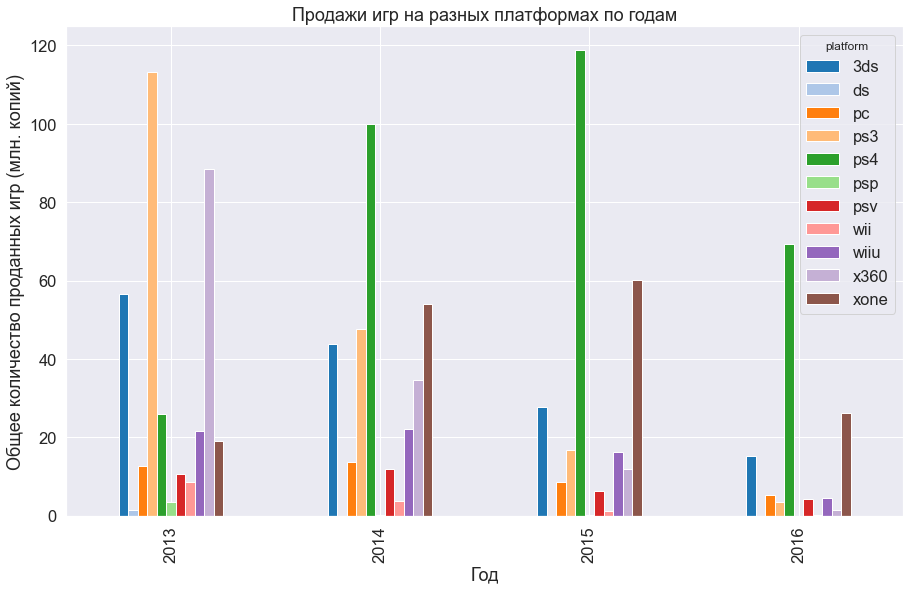

In [20]:
# построим график по продажам игр на разных платформах за период с 2013 года
sns.set(rc={"figure.figsize":(15, 9)}, font_scale = 1.5, style="darkgrid", palette="tab20")

(good_data_games
 .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
 .plot(kind="bar", grid=True)
)

plt.title("Продажи игр на разных платформах по годам")
plt.ylabel("Общее количество проданных игр (млн. копий)")
plt.xlabel("Год")

Text(0.5, 0, 'Типы игровых платформ')

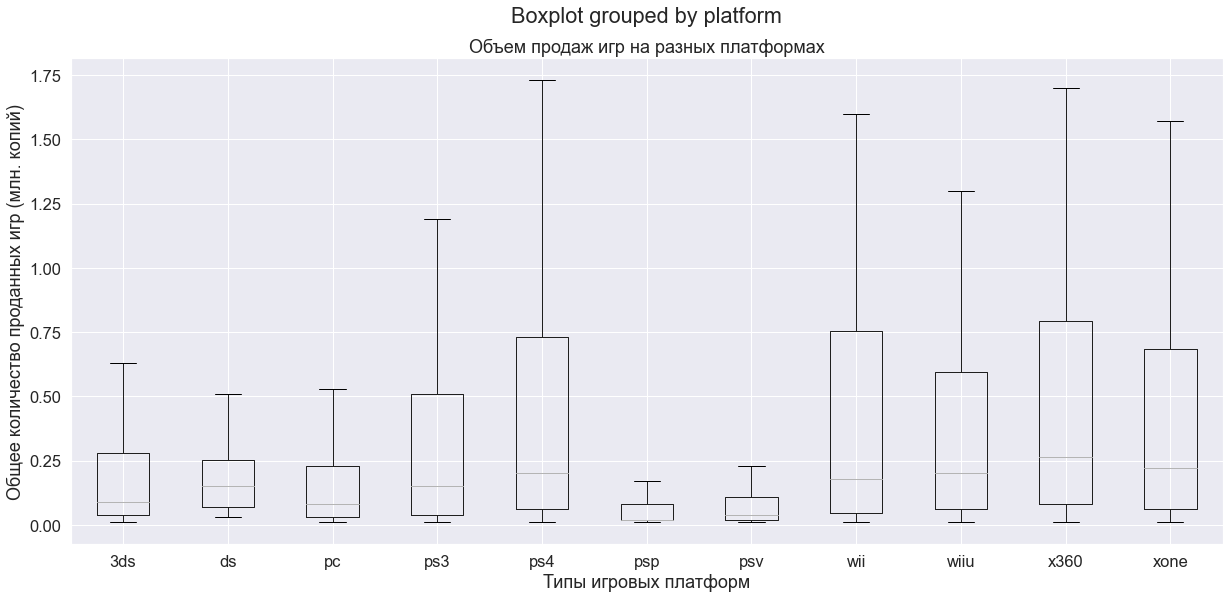

In [21]:
# изучим глобальные продажи игр в разбивке по платформам
good_data_games.boxplot("total_sales", by="platform", showfliers=False, figsize=(20, 9))
plt.title("Объем продаж игр на разных платформах")
plt.ylabel("Общее количество проданных игр (млн. копий)")
plt.xlabel("Типы игровых платформ")

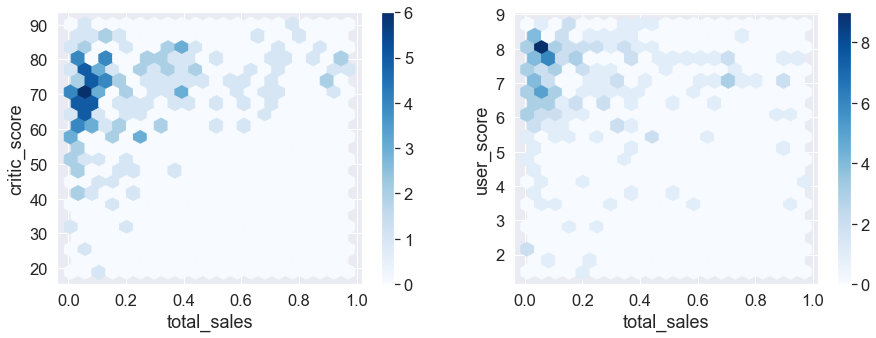

In [22]:
# возьмем популярную платформу и узнаем зависят ли продажи игр от оценок критиков и пользователей

# построем диаграмму рассеивания для платформы ps4
rows = 1
cols = 2
fig, axes = plt.subplots(1,2)
axes = axes.ravel()
i = 0
 
for key in ["critic_score", "user_score"]:
    ax = (good_data_games
          .query("platform == 'ps4' and critic_score <= 100 and user_score <= 10 and total_sales < 1"))
    ax.plot(x='total_sales', y=key, kind='hexbin', ax = axes[i],
            gridsize=20, figsize=(15, 5), sharex=False, grid=True, cmap="Blues")
    i+=1

In [23]:
# подсчитаем корреляцию оценок критиков/пользователей и продаж игр
(good_data_games
 .query("platform == 'ps4' and critic_score <= 100 and user_score <= 10 and total_sales < 1")
 .corr()[["total_sales"]]
 .sort_values("total_sales", ascending=False)
 .transpose()
 .style.background_gradient(axis=1, cmap="Blues")
)

,total_sales,other_sales,eu_sales,na_sales,critic_score,jp_sales,user_score,year_of_release
total_sales,1.000000,0.988952,0.870478,0.857819,0.308644,0.215606,-0.015898,-0.205500


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы 'ps3'


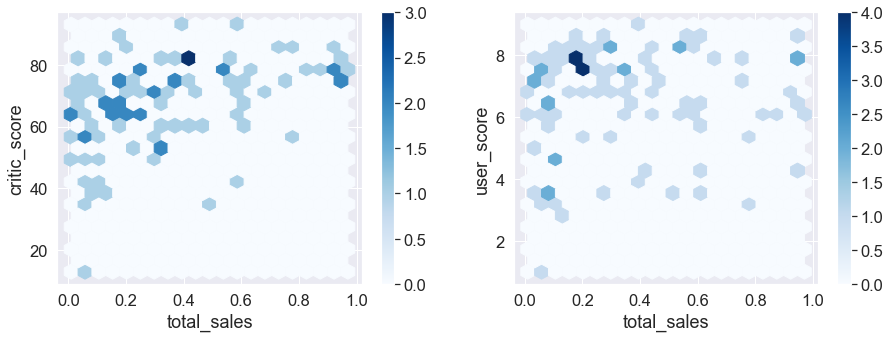

Показатели корреляции для платформы 'ps3'


,total_sales,critic_score,user_score
total_sales,1.000000,0.403091,0.055334



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы 'x360'


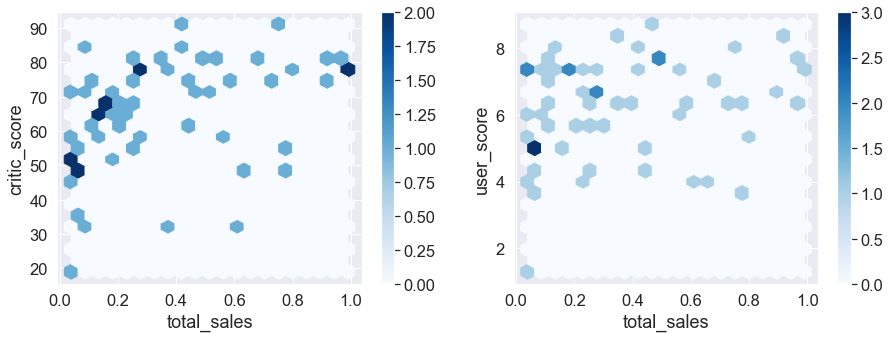

Показатели корреляции для платформы 'x360'


,total_sales,critic_score,user_score
total_sales,1.000000,0.394798,0.216433



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы '3ds'


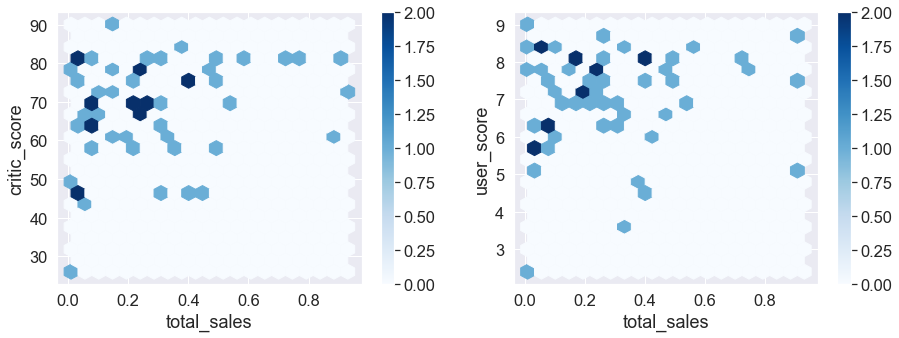

Показатели корреляции для платформы '3ds'


,total_sales,critic_score,user_score
total_sales,1.000000,0.254132,0.109909



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы 'xone'


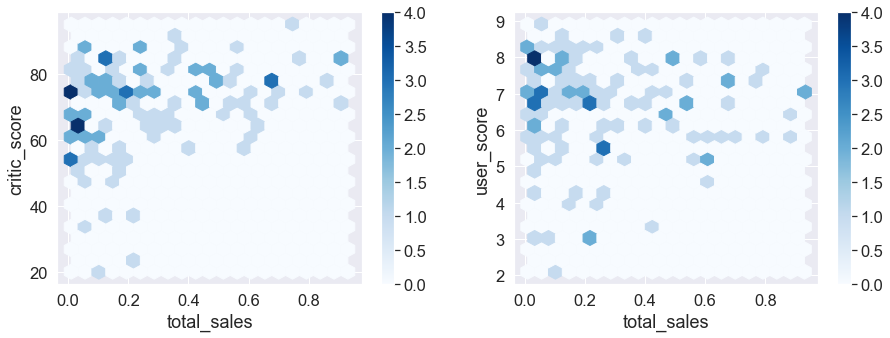

Показатели корреляции для платформы 'xone'


,total_sales,critic_score,user_score
total_sales,1.000000,0.300717,-0.034153



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы 'wiiu'


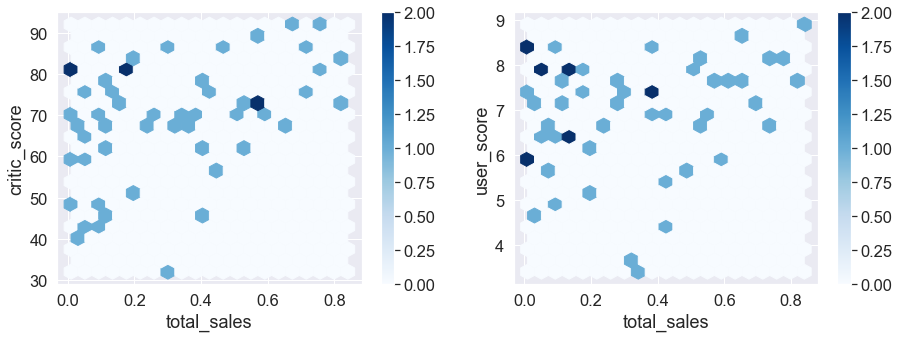

Показатели корреляции для платформы 'wiiu'


,total_sales,critic_score,user_score
total_sales,1.000000,0.389272,0.203459



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы 'pc'


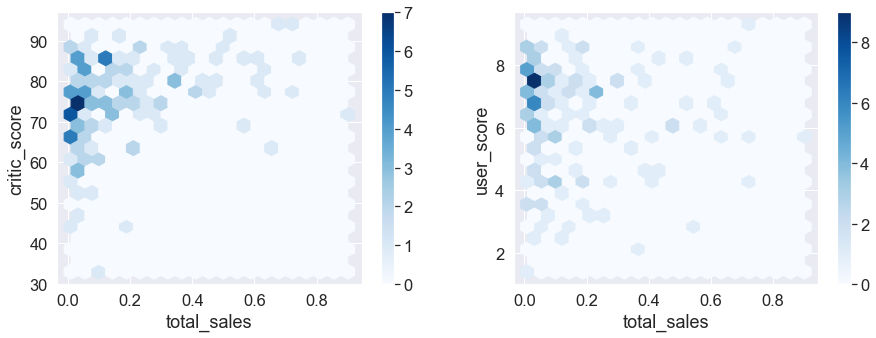

Показатели корреляции для платформы 'pc'


,total_sales,critic_score,user_score
total_sales,1.000000,0.321421,-0.010539



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
График зависимости продаж и оценок для платформы 'psv'


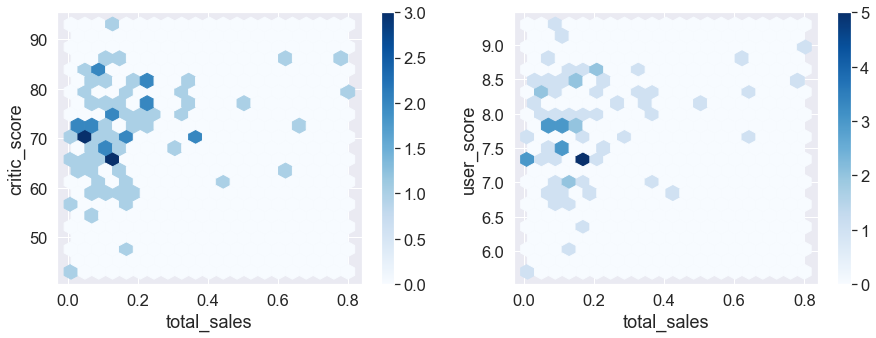

Показатели корреляции для платформы 'psv'


,total_sales,user_score,critic_score
total_sales,1.000000,0.265478,0.254100


In [24]:
# изучим оставшиеся актуальные платформы, 
# исключим уже проверенную выше платформу ps4 и исчезнувшие с рынка ds, psp, wii
other_platform = list(good_data_games.query("platform != ['ps4', 'ds', 'psp', 'wii']")["platform"].unique())

# создадим цикл и построем графики зависимости продаж игр 
# от оценок критиков и пользователей, оценим корреляцию
for platform in other_platform:
    print("\033[1m\033[34m~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("\033[1m\033[34mГрафик зависимости продаж и оценок для платформы '{}'".format(platform))
    rows = 2
    cols = 20
    fig, axes = plt.subplots(1,2)
    axes = axes.ravel()
    i = 0
    # сформируем актуальную таблицу с учетом платформы
    actual_data = (good_data_games[good_data_games["platform"] == platform]
                   .query("critic_score <= 100 and user_score <= 10 and total_sales < 1")
                   [["critic_score", "user_score", "total_sales"]])
    # построем графики рассеивания
    # try-except на случай, если данных для какой-либо платформы будет не хватать (увидим пустые графики)
    for column in ["critic_score", "user_score"]:
        try:
            actual_data.plot(x="total_sales", y=column, kind="hexbin", ax = axes[i],
                             gridsize=20, figsize=(15, 5), sharex=False, grid=True, cmap="Blues")
            i+=1
            if i > 1:
                i = 0
        except: pass
    plt.show()
    # для каждой платформы оценим корреляцию между продажами и оценками
    print("\033[0m\033[34mПоказатели корреляции для платформы '{}'".format(platform))
    display((actual_data.corr()[["total_sales"]]
             .sort_values("total_sales", ascending=False)
             .transpose()
             .style.background_gradient(axis=1, cmap="Blues")))
    print()

Text(0.5, 0, 'Тип игровой платформы')

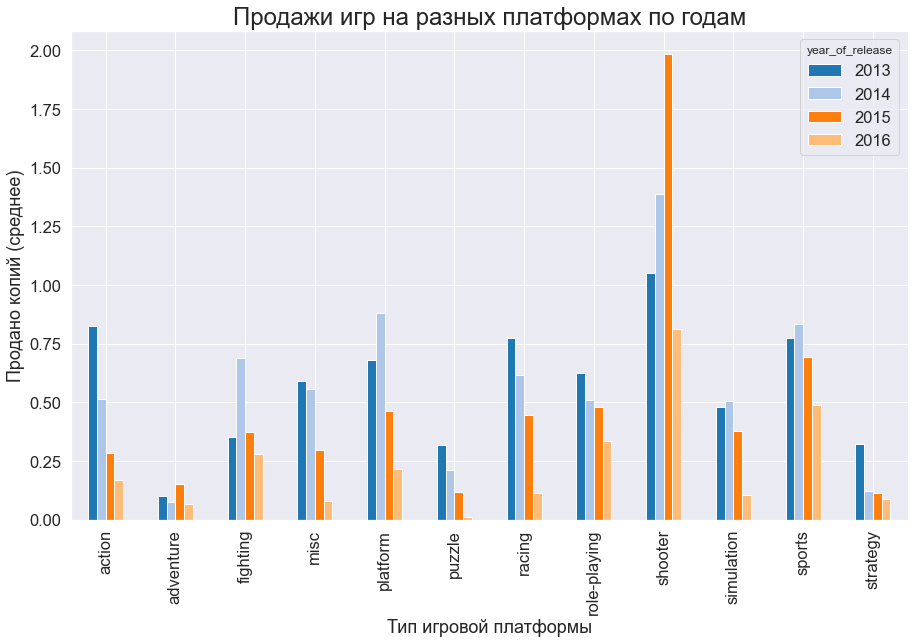

In [25]:
# изучим игровые жанры: популярность, прибыльность, возможные тенденции и зависимости
(good_data_games
 .pivot_table("total_sales", index="genre", columns="year_of_release", aggfunc="mean")
 .plot(kind="bar", grid=True)
)

sns.set(rc={"figure.figsize": (20, 7)}, font_scale=2, palette="pastel")
plt.title("Продажи игр на разных платформах по годам")
plt.ylabel("Продано копий (среднее)")
plt.xlabel("Тип игровой платформы")

In [26]:
# выделим топ лучших жанров
(good_data_games
 .pivot_table(index="genre", values="total_sales", aggfunc="mean")
 .sort_values("total_sales", ascending=False)
 .head(6)
)

,total_sales
genre,
shooter,1.245882
sports,0.703972
platform,0.576081
role-playing,0.499623
racing,0.469294
fighting,0.441375


### 3.4 Выводы: актуальные платформы и результаты исследования критериев оценки популярности игр <a name="3.4"></a>

Изучив тенденции продаж игр на разных платформах в период с 2013 по 2016 года, можно сделать следующие выводы:

* ушли с рынка следующие платформы: ds, psp, wii,
* существенно снизились объемы продаж: 3ds, ps3, x360, 
* стабильно низкие, склонные к снижению: pc, psv, wiiu,
* востребованные на рынке платформы: ps4, xone

**Топ-3 платформы,** удерживающие позиции и относительно высокие объемы продаж в сравнении с остальными в 2015-2016 годах: 

1. "ps4", 
2. "xone", 
3. "3ds".  

На основе данных о самой популярной платформе, мы проверили, **есть ли зависимость между продажами игр и оценками критиков и пользователей.** Сильной зависимости не обнаружилось: это видно на графиках и подтверждается коэффициентами корреляции. Интересно отметить, что оценки критиков более стабильны и имеют слабую прямую корреляцию, когда как оценки пользователей более хаотичны (эмоциональны) и не имеют влияние на итоговые продажи. Возможно, оценки больше влияют на развитие игры в будущем: будут ли новые серии и развитие сюжета в других частях, однако, проверка данной гипотезы выходит за рамки целей данного исследования.  

Отсутствие сильной зависимости продаж игр от оценок пользователей и критиков также подтверждается данными по другим актуальным платформам: ps3, x360, 3ds, xone, wiiu, pc и psv.

Среди жанров стабильно удерживают позиции из года в год такие, как shooter, sports и platform, а **наименее популярные жанры "на любителя"** — puzzle, strategy и adventure. 

**Топ-5 востребованных жанров:**

1. "shooter",
2. "sports",
3. "platform",
4. "role-playing" разделяет позицию с "racing",
5. "fighting".
  
**Среди отличительных черт популярных жанров** на уровне пользовательского опыта, можно выделить динамичность, эмоциональность и скорость получения "результата" (особенно актуально для боев fighting, гонок racing и имитации спортивных игр sports). Наименее популярные игры, напротив, как правило требуют длительного времени для получения результата, разгадывания головоломок и медленное развитие сюжета/событий.

## Часть 4. Анализ "портретов" пользователей для разных регионов <a name="4"></a>

### 4.1 Анализ популярности платформ/жанров для регионов (NA, EU, JP) <a name="4.1"></a>

In [27]:
# создадим словарь с наименованиями неорегионов
regions_dict = ({
    "na_sales" : "NA (North America)",
    "eu_sales" : "EU (Europe)",
    "jp_sales" : "JP (Japan)"
})

# создадим таблицу с актуальными платформами для каждого региона
valid_platform_data = (good_data_games
                       .query("platform != ['ds', 'psp', 'wii']")
                       .reset_index(drop=True))

# удалим линие столбцы
valid_platform_data.drop(["other_sales", "user_score", "critic_score"], axis=1, inplace=True)

In [28]:
# проанализируем популярность платформ для разных регионов 
# и оценим объем продаж на региональном рынке для каждой из топ-5

# функция для поиска топ-5 платформ и расчета доли продаж на каждой
for key in regions_dict:
    print("\033[1m\033[34m~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("\033[1m\033[34mДанные по региону: {}\033[0m".format(regions_dict[key]))
    print()
    
    # создадим актуальную таблицу для региона
    data_for_region = (
        valid_platform_data
        .pivot_table(index="platform", values=key, aggfunc="sum")
        .reset_index()
        .sort_values(key, ascending=False)
    )
    
    # выделим топ-5 платформ для региона
    top_platform_region = list(data_for_region["platform"].head(5))
    
    # подсчитаем объем игрового рынка в регионе и выведем данные на экран
    sales_all_platform = data_for_region[key].sum()
    print("\033[34mОбщий объем продаж в регионе (млн. копий):\033[0m {}".format(int(sales_all_platform.round(0))))
    
    # подсчитаем долю продаж на рынке для топ-5 платформ и выведем результаты
    print("\033[34mДоля рынка для топ-5 платформ:\033[0m")
    for top_platform in top_platform_region:
        sales_segment = (data_for_region[data_for_region["platform"] == top_platform][key] / sales_all_platform) * 100
        print("\033[34m— {}\033[0m: ~{}%".format(top_platform, int(sales_segment.round(0))))
    
    # выведем таблицу с суммарным количеством проданных копий для топ-5 платформ в регионе
    display(data_for_region.head(5))
    print()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Данные по региону: NA (North America)

Общий объем продаж в регионе (млн. копий): 431
Доля рынка для топ-5 платформ:
— ps4: ~25%
— xone: ~22%
— x360: ~19%
— ps3: ~15%
— 3ds: ~9%


,platform,na_sales
3,ps4,108.74
7,xone,93.12
6,x360,81.66
2,ps3,63.50
0,3ds,38.20



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Данные по региону: EU (Europe)

Общий объем продаж в регионе (млн. копий): 386
Доля рынка для топ-5 платформ:
— ps4: ~37%
— ps3: ~18%
— xone: ~13%
— x360: ~11%
— 3ds: ~8%


,platform,eu_sales
3,ps4,141.09
2,ps3,67.81
7,xone,51.59
6,x360,42.52
0,3ds,30.96



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Данные по региону: JP (Japan)

Общий объем продаж в регионе (млн. копий): 137
Доля рынка для топ-5 платформ:
— 3ds: ~49%
— ps3: ~17%
— psv: ~14%
— ps4: ~12%
— wiiu: ~8%


,platform,jp_sales
0,3ds,67.81
2,ps3,23.35
4,psv,18.59
3,ps4,15.96
5,wiiu,10.88


In [29]:
# выделим топ-5 жанров в разных регионах
# создадим цикл для поиска популярных жанров
for key in regions_dict:
    print("\033[1m\033[34m~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("\033[1m\033[34mПопулярные игровые жанры в регионе {}\033[0m".format(regions_dict[key]))
    genre_for_region = (
        valid_platform_data
        .pivot_table(index="genre", values=key, aggfunc="sum")
        .reset_index()
        .sort_values(key, ascending=False)
    )
    
    display(genre_for_region.head(5))
    print()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Популярные игровые жанры в регионе NA (North America)


,genre,na_sales
0,action,124.43
8,shooter,109.74
10,sports,65.12
7,role-playing,46.40
3,misc,24.00



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Популярные игровые жанры в регионе EU (Europe)


,genre,eu_sales
0,action,117.24
8,shooter,87.86
10,sports,59.60
7,role-playing,36.97
6,racing,20.19



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Популярные игровые жанры в регионе JP (Japan)


,genre,jp_sales
7,role-playing,50.01
0,action,39.65
3,misc,8.98
2,fighting,7.63
8,shooter,6.61


### 4.2 Анализ влияния рейтинга ESRB на продажи в регионах (NA, EU, JP) <a name="4.2"></a>

In [30]:
# промаркеруем пропуски в данных в колонке "rating" значением — no_rating
valid_platform_data["rating"] = valid_platform_data["rating"].fillna("no_rating")

In [31]:
# выделим средние по наиболее продаваемым играм с учетом рейтинга ESRB в разных регионах
(valid_platform_data
 .pivot_table(index="rating", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="mean")
 .style.background_gradient(axis=0, cmap="Blues")
)

,eu_sales,jp_sales,na_sales
rating,,,
E,0.285559,0.052448,0.274336
E10+,0.156901,0.024339,0.198223
M,0.391935,0.037930,0.444328
T,0.126647,0.061752,0.150423
no_rating,0.086439,0.090408,0.098291


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Средняя доля игр с рейтингом ESRB в регионе NA (North America)


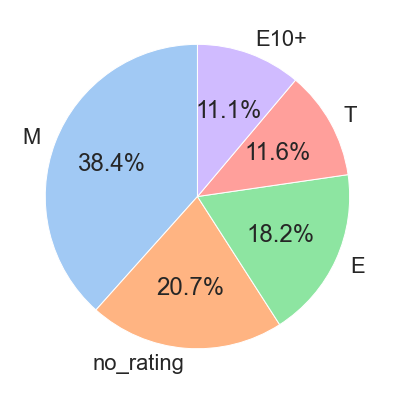

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Средняя доля игр с рейтингом ESRB в регионе EU (Europe)


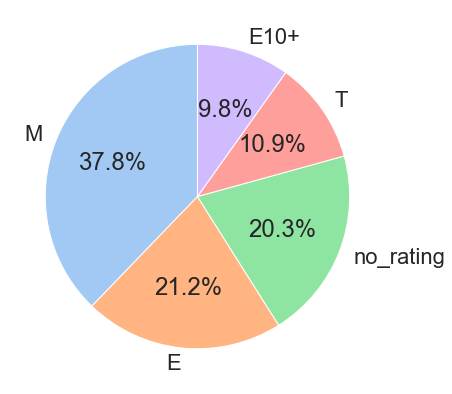

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Средняя доля игр с рейтингом ESRB в регионе JP (Japan)


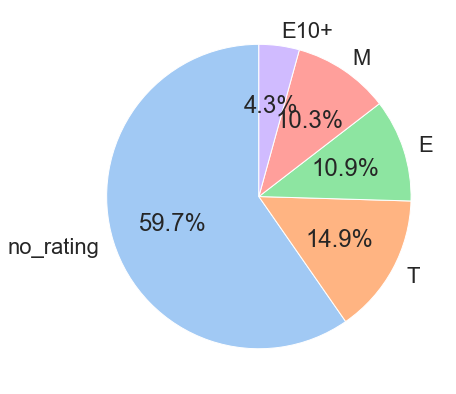

In [32]:
# узнаем доли рынка в регионе для игр с разным рейтингом ESRB
for region in ["na_sales", "eu_sales", "jp_sales"]:
    print("\033[1m\033[34m~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("\033[1m\033[34mСредняя доля игр с рейтингом ESRB в регионе {}\033[0m".format(regions_dict[region]))
    # подготовим таблицу, сгруппировав данные по рейтингу ESRB
    esrb_ragion = (valid_platform_data
                   .pivot_table(index="rating", values=region, aggfunc="sum")
                   .sort_values(region, ascending=False))
    # выведем на экран круговую диаграмму для каждого региона
    labels = esrb_ragion.index
    fig, ax = plt.subplots()
    ax.pie(np.array(esrb_ragion).ravel(), labels=labels, autopct="%1.1f%%", startangle=90)
    plt.show()

### 4.3 Вывод: различия игрового рынка для разных регионов <a name="4.3"></a>

По данным за 2013-2016 года **мы выявили топ-5 платформ среди актуальных для трех регионов NA (North America), EU (Europe) и JP (Japan).** На основе проведенного исследования можно сделать несколько интересных выводов:

* лидер потребления на игровом рынке по общему объему продаж за последние годы — NA, на втором месте — EU и с большим отставанием идет JP.
* рынок NA и EU похож по предпочтениям пользователей в выборе игровых платформ,
* в топ-5 популярных платформ для NA и EU вошли: ps4, xone, x360, ps3 и 3ds,
* на рынке NA и EU лидер среди платформ ps4, а платформа 3ds заняла пятое место и занимает менее 10% рынка,
* игровой рынок JP отличается от рынков NA и EU по предпочтениям пользователей в выборе игровых платформ и требует от компании отдельной стратегии развития и продвижения,
* в топ-5 на рынке JP вошли следующие платформы: 3ds, ps3, psv, ps4, wiiu.
* лидер на рынке JP — 3ds (доля на рынке Японии 49%), а популярная в NA и EU платформа ps4 занимает 4 место (доля 12%). 

Также мы изучили **пользовательские предпочтения в игровых жанрах для каждого региона:**

* топ-4 для регионов NA и EU полностью совпадают: action, shooter, sports и role-playing. На пятой позиции рейтинга в NA  — misc, а в EU — racing,
* пользователи на игровом рынке JP отдают предпочтение таким жанрам, как: role-playing, action, misc, fighting и shooter,
* необычное явление заключается в том, что в топ-5 жанров по суммарным продажам в мире не вошли такие жанры, как action и misc, которые популярны на региональных рынках.

Для игр с присвоенным рейтингом ESRB в каждом регионе мы построили круговые диаграммы и таблицу со средними объемами продаж игр для каждого рейтинга. В нашей выгрузке данных за 2013-2016 год по актуальным для 2016 года платформам есть большое количество пропусков в колонке рейтинга и представлены только следующие типы: M, E10, T, E. Чтобы получить более объективную картину в долях рынка и среднего объема продаж  для игр с разным рейтингом, *мы промаркировали пропуски значением "no_rating".*

**На основе полученных данных о классификации игр ESRB можно сделать следующие выводы:**

* в данных определены 4 типа игр по класификации ESRB: M (от 17 лет), E10 (от 10 лет), T (от 13 лет), E (для всех), от 20 до 60% игр в зависимости от региона с маркером "no_rating",
* рынки NA и EU имеют схожее распределение игр с разным рейтингом и наибольший объем продаж приходится на игры с рейтингом М, а на второй позиции игры класса Е, при этом игры с маркером "no_rating" составили ~21% в каждом регионе,
* рынок JP значительно отличается и для ~60% игр рейтинг ESRB не определен. Это может быть связано с тем, что в регионе представлено большое количество локальных игр, которые классифицируются организацией Computer Entertainment Rating Organization (CERO), основанной в 2002 году.

Изучив данные по классификации игр от ESRB, *мы выявили новые возможные причины большого количества пропусков в колонке рейтинга* — на данный момент существует около 15 крупных компаний, занимающихся оценкой и присваиванием рейтинга для игр. Эти компании распределены территориально и Entertainment Software Rating Board (ESRB) в большей степени присутствует на рынке США, Канады и Мексики. Для Европы (около 30 стран), Квебека, и иногда для России рейтинг игр определяет также компания Pan European Game Information (PEGI), а на рынке Японии — Computer Entertainment Rating Organization (CERO). Также важно учитывать, что единых критериев оценки и присваивания того или иного возрастного ограничения не существует на данный момент, поэтому не стоит опираться на одни данные, есть смысл разграничивать рынки даже схожие, как NA и EU. *Опираться на классификацию при построении стратегии и прогнозов будет ненадежно, так как слишком много дополнительных факторов влияет на данный параметр.* 

При этом **обратить внимание необходимо на те классы в рейтингах для разных стран, которые наиболее жестко ограничивают продажи игр**, например, продажи игр категории Z по классификации CERO контролируются государством в Японии. Cреди таких игр могут быть игры с более мягкими категориями по рейтингу ESRB,  например, "gears of war" в Японии имеет знак Z, а в Северной Америке — M.

## Часть 5. Проверка рабочих гипотез для построения прогнозов на новый сезон <a name="5"></a>

In [33]:
# подготовим функцию для расчета основных статистик, в том числе дисперсии
# функция подсчета среднего, дисперсии и стандартного отклонения для выборки
def math_stat(data):
    print("Среднее значение: ", data.mean().round(1), "(медиана: {})".format(data.median()))
    print("Дисперсия: ", np.var(data, ddof=1).round(1))
    print("Стандартное отклонение: ", np.std(data, ddof=1).round(1))

In [34]:
# функция для автоматизации постоения гистограмм и запуска вычисления статистик
def hist_stat(data, dict_data, column_goal, column_hist, x, y):
    data_one = data[data[column_goal] == dict_data["1"]]
    data_two = data[data[column_goal] == dict_data["2"]]
    
    ax = data_one[column_hist].hist(bins=50, alpha=0.5, label=dict_data["1"])
    data_two[column_hist].hist(bins=50, alpha=0.5, label=dict_data["2"])
    sns.set(rc={"figure.figsize":(19, 7)}, font_scale = 1, style="darkgrid", palette="rainbow")
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.legend()
    plt.show()
    
    print("\033[1m\033[34mОсновные статистики:\033[0m")
    print()
    print("\033[34mДля '{}' по колонке {}\033[0m".format(dict_data["1"], column_hist))
    display(math_stat(data_one[column_hist]))
    print()
    print("\033[34mДля '{}' по колонке {}\033[0m".format(dict_data["2"], column_hist))
    display(math_stat(data_two[column_hist]))

### 5.1 Гипотеза о пользовательских оценках для разных платформ <a name="5.1"></a>

Чтобы проверить утверждение о том, что **"средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые", сформулируем нулевую и альтернативные гипотезы:**  
* H<sub>0</sub>: средние пользовательские рейтинги платформ xone и pc равны  
* H<sub>1</sub>: средние пользовательские рейтинги этих платформ не равны  
  
Изучим распределение оценок пользователей для игр на платформах xone и pc — для этого построем гистограммы и вычислим основные статистики.

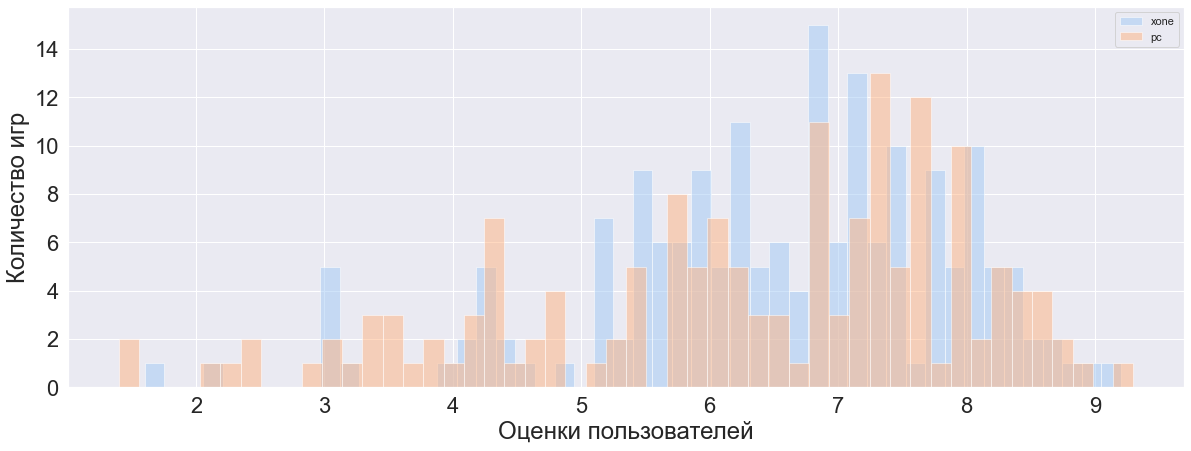

Основные статистики:

Для 'xone' по колонке user_score
Среднее значение:  6.5 (медиана: 6.8)
Дисперсия:  1.9
Стандартное отклонение:  1.4


None


Для 'pc' по колонке user_score
Среднее значение:  6.3 (медиана: 6.8)
Дисперсия:  3.0
Стандартное отклонение:  1.7


None

In [35]:
# проверяемые платформы созраним в словарик
xone_pc = ({"1" : "xone", "2" : "pc"})

# применим функцию, чтобы оценить распределение оценок пользователей для платформ xone и pc
hist_stat(good_data_games[good_data_games["user_score"] <= 10], 
          xone_pc, 
          "platform", 
          "user_score", 
          "Оценки пользователей",
          "Количество игр"
         )


Распределение стремится к нормальному, средние оценки практически равны, но дисперсия по платформе xone значительно больше дисперсии по pc — это необходимо учесть в проверке гипотез. Для проверки двусторонних гипотез мы используем метод `scipy.stats.ttest_ind(array1, array2, equal_var)` и настроем параметр `equal_var = False`, так как дисперсии значительно отличаются. 

In [36]:
# зададим параметр alpha
alpha = 0.05

# подготовим данные к проверке гипотез
xone_user_score = good_data_games[good_data_games["platform"] == "xone"].query("0 <= user_score <= 10")["user_score"]
pc_user_score = good_data_games[good_data_games["platform"] == "pc"].query("0 <= user_score <= 10")["user_score"]

# проверим нулевую гипотезу
result_xone_pc_hipothesis = st.stats.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

# узнаем p-value для двусторонней гипотезы
print("p-значение: ", result_xone_pc_hipothesis.pvalue)

if (result_xone_pc_hipothesis.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


**Результат:**  
Полученное значение p-value говорит о том, что результат не является статистически значимым и мы не можем отвергнуть нулевую гипотезу в пользу альтернативной, это означает, что мы принимаем гипотезу: средние пользовательские рейтинги платформ xone и pc равны.

### 5.2 Гипотеза о пользовательских оценках для разных игровых жанров <a name="5.2"></a>

Чтобы проверить утверждение о том, что **"средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные", сформируем нулевую и альтернативные гипотезы (двусторонние):**  
* H<sub>0</sub>: средние пользовательские рейтинги жанров action и spors равны  
* H<sub>1</sub>: средние пользовательские рейтинги этих жанров не равны  
  
Построем гистограммы и вычислим основные статистики, чтобы оценить распределение пользовательских оценик для игр в жанрах action и sports:

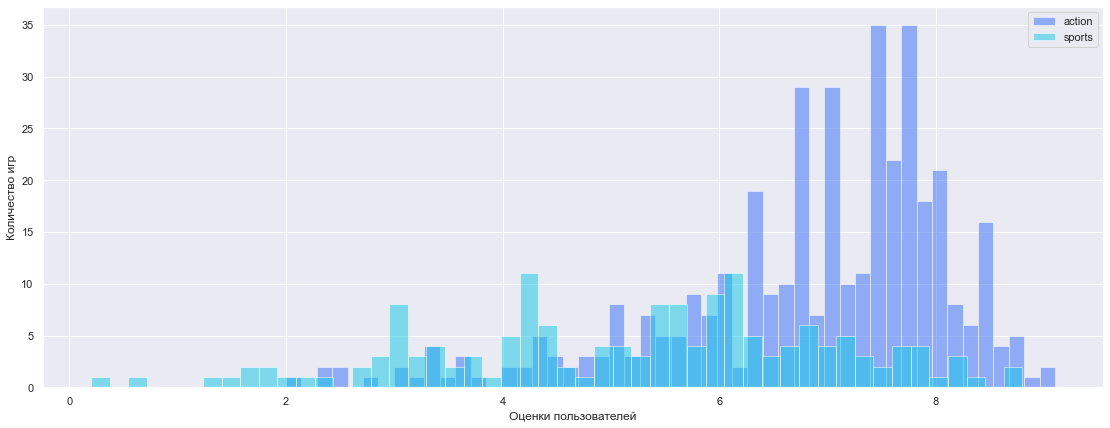

Основные статистики:

Для 'action' по колонке user_score
Среднее значение:  6.8 (медиана: 7.1)
Дисперсия:  1.8
Стандартное отклонение:  1.3


None


Для 'sports' по колонке user_score
Среднее значение:  5.2 (медиана: 5.5)
Дисперсия:  3.2
Стандартное отклонение:  1.8


None

In [37]:
# проверяемые жанры созраним в словарик
action_sports = ({"1" : "action", "2" : "sports"})

# применим функцию, чтобы оценить распределение оценок пользователей для жанров action и sports
hist_stat(good_data_games[good_data_games["user_score"] <= 10], 
          action_sports, 
          "genre", 
          "user_score", 
          "Оценки пользователей",
          "Количество игр"
         )

Распределения нормальные, есть значительное отличие в средних значениях и для жанра sports оценки распределениы более равномерно с меньшим количеством пиков. Дисперсии значительно отличаются и при проверке гипотез это необходимо учесть. Для проверки двусторонней гипотезы мы пременим метод `scipy.stats.ttest_ind(array1, array2, equal_var)` и укажем параметр `equal_var = False`, учитывая разницу дисперсий.

In [38]:
# значение alpha оставим прежнее — 0.05
# подготовим данные к проверке гипотез
action_user_score = good_data_games[good_data_games["genre"] == "action"].query("0 <= user_score <= 10")["user_score"]
sports_user_score = good_data_games[good_data_games["genre"] == "sports"].query("0 <= user_score <= 10")["user_score"]

# проверим нулевую гипотезу
result_action_sports_hipothesis = st.stats.ttest_ind(sports_user_score, action_user_score, equal_var=False)

# узнаем p-value для двусторонней гипотезы
print("p-значение: ", result_action_sports_hipothesis.pvalue)

if (result_action_sports_hipothesis.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.3883444596405356e-20
Отвергаем нулевую гипотезу


**Результат проверки:**  
Значение p-value меньше уровня критической статистической значимости alpha, поэтому мы отвергаем нулевую гипотезу в пользу альтернативной: средние пользовательские рейтинги этих жанров не равны. В данном слечае среднее значение оценок пользователей для жанра action больше, чем у жанра sports.

### 5.3 Выводы: результаты проверки гипотез <a name="5.3"></a>

В результате проверки статистической значимости выдвинутых гипотез мы приняли гипотезу о том, что средние пользовательские рейтинги игр на платформах xone и pc равны. При этом если взять отдельные жанры, например, action и sports, мы не смогли принять гипотезу о равенстве их средних оценок. Это может означать, что на оценки пользователей в большей степени влияет тип игры по жанру (а также десятки других параметров, относящихся к качеству отрисовки, сюжетной линии и субъективным предпочтениям самого пользователя), чем платформа, на которой пользователь с этой игрой знакомится. Однако, для проверить это предположение на текущей выборке мы не можем более точно.

## Итоговые выводы исследования <a name="6"></a>

**Цель исследования** — выявить закономерности, определяющие успешность игры, для прогнозирования популярности новых игр и планирования рекламных кампаний со ставкой на потенциально "звездные" релизы.

В ходе исследования был выявлен средний цикл жизни игровой платформы на рынке — 10 лет, при этому **пик популярности платформа достигает на 3-5 год существования**, а после появляются новые, более технологичные платформы или готовятся к релизу новые версии старых платформ. Это означает, что **для прогнозов необходимо учитывать "жизненный цикл"** платформы, отдавая приоритет более молодым версиям (3-5 лет на рынке) **и следить за анонсами выхода новых версий популярных на текущий момент платформ** (так как есть тенденция "преемственности" — с выходом новой версии платформы, старая начинает терять популярность, а новая быстрее завоевывает аудиторию).

Для построения прогнозов подходят данные за последние 2-3 года: для нашего исследования был взят период с 2013 по 2016 года.

**Топ-3 платформы,** удерживающие позиции и относительно высокие объемы продаж в мире в сравнении с остальными в 2015-2016 годах:
1. "ps4" — PlayStation 4, игровая приставка восьмого поколения, выпускаемая японской компанией Sony, выпуск новой консоли происходит раз в 6-7 лет,
2. "xone" — Xbox One, игровая приставка от компании Microsoft, являющаяся преемницей Xbox 360, выпуск новой консоли каждые 6-7 лет,
3. "3ds" — Nintendo 3DS,  портативная игровая система производства Nintendo.

**Пользовательские предпочтения в игровых жанрах для каждого региона:**
- топ-4 для регионов NA и EU полностью совпадают: action, shooter, sports и role-playing. На пятой позиции рейтинга в NA — misc, а в EU — racing,
- пользователи на игровом рынке JP отдают предпочтение таким жанрам, как: role-playing, action, misc, fighting и shooter.

**Среди отличительных черт популярных жанров** на уровне пользовательского опыта, можно выделить динамичность, эмоциональность и скорость получения "результата" (особенно актуально для боев fighting, гонок racing и имитации спортивных игр sports). Наименее популярные игры, напротив, как правило требуют длительного времени для получения результата, разгадывания головоломок и медленное развитие сюжета/событий.

**Факторы, которые не нашли подтверждения при проверке зависимости продаж игр от них:**
* зависимость между продажами игр и оценками критиков и пользователей не обнаружена,
* опираться на классификацию при построении стратегии и прогнозов будет ненадежно, так как слишком много дополнительных факторов влияет на данный параметр.

В результате проверки статистической значимости выдвинутых гипотез мы приняли гипотезу о том, что средние пользовательские рейтинги игр на платформах xone и pc равны. При этом если взять отдельные жанры, например, action и sports, мы не смогли принять гипотезу о равенстве их средних оценок. Можно выдвинуть предположение, что игровая платформа не влияет на оценки пользователями игр.

**При построении прогнозов, рекомендуем обратить внимание на следующие выводы:**  
* учесть наличие разных компаний, присваивающих классификацию игр по возрастным ограничениям: выделить классы в рейтингах для разных стран, которые наиболее жестко ограничивают продажи игр (например, Z-категория в Японии от компании CERO — контроль продаж государством),
* в прогнозах стоит учитывать популярность игровой платформы,
* среди жанров игр есть популярные и "на любителя", этот фактор стоит отслеживать и учесть в прогнозах
* рынки игр Северной Америки, Европы и регионами, обозначенными в данных как "другие" схожи по пользовательским предпочтениям в жанрах, платформах,
* рынок Японии существенно отличается от остальных и требует отдельной стратегии развития компании.

____
**<center>[Перейти в начало исследования](#0)</center>**